<a href="https://colab.research.google.com/github/santoshshabadu/datascience/blob/main/Food_Hub_Full_Code_Santosh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 9.8 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.0 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.1 requires matplotlib>=3.8.0, but you have matplotlib 3.7.1 which is incompatible.
plotnine 0.14.1 

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Write your code here to read the data
food=pd.read_csv("https://raw.githubusercontent.com/santoshshabadu/Datasets/refs/heads/main/foodhub_order.csv");

In [5]:
# Write your code here to view the first 5 rows
food.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
food.shape

(1898, 9)

#### Observations:
The Foodhub dataset has 1898 number of rows with 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# Write your code here
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
Dataset has 5 Numerical columns - 4 are of int type and 1 is of float. There are 4 objects(Categorical variables). Rating is categorized as object since there are few customers who didn't give a rating and it is classified as a string 'Not Given'

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
food.isna()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1893,False,False,False,False,False,False,False,False,False
1894,False,False,False,False,False,False,False,False,False
1895,False,False,False,False,False,False,False,False,False
1896,False,False,False,False,False,False,False,False,False


#### Observations:
There are no missing values. However, we see there were few customers who didn't give a rating and it is populated with a string 'Not Given'

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [9]:
food.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
Once an order is placed, Average time it takes to prepare the food is 27.4 Minutes, while the quickest order prepared in 20 minutes and the slowest order was prepared in 35 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [10]:
# Write the code here
#Option 1
food['order_id'][food['rating']=='Not given'].nunique()


#Option 2
#food['rating'][food['rating']=='Not given'].value_counts()
#since all rows are unique at Order Id level, rating count will same as order count

#Option 3
#food.loc[food['rating']=='Not given'].shape
#We can then look at the row count, since all rows are unique at Order Id level

736

#### Observations:
There are 736 orders not rated by customers

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

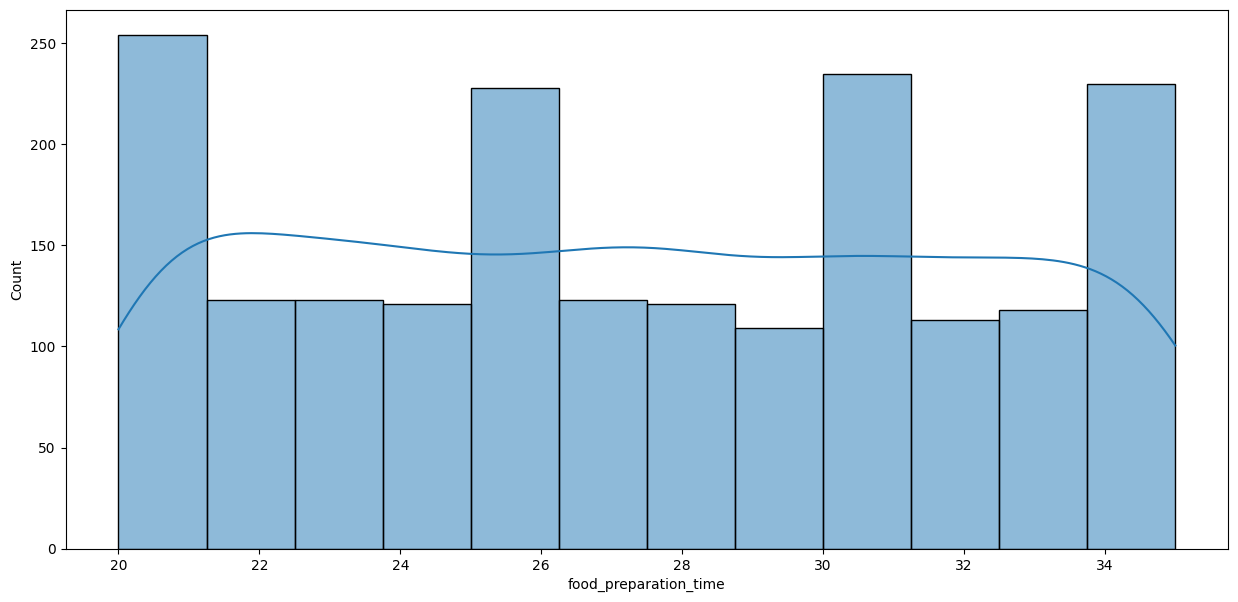

In [11]:
# Write the code here
plt.figure(figsize=(15, 7))
sns.histplot(data=food,x='food_preparation_time', kde= True);

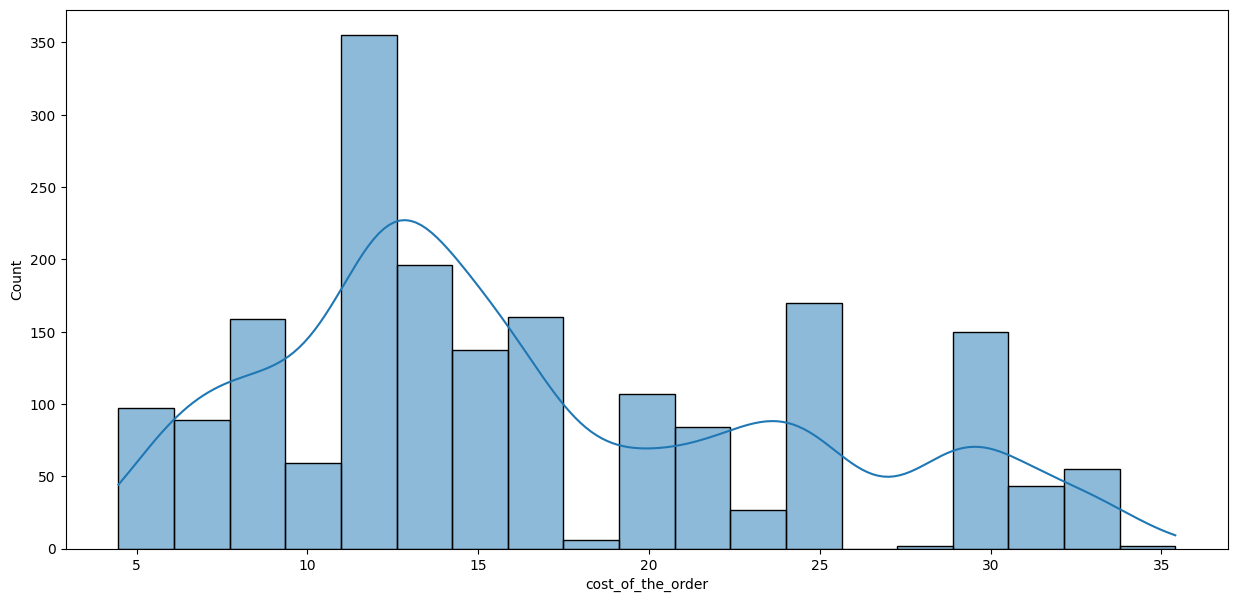

In [12]:
plt.figure(figsize=(15, 7))
sns.histplot(data=food,x='cost_of_the_order', kde= True);

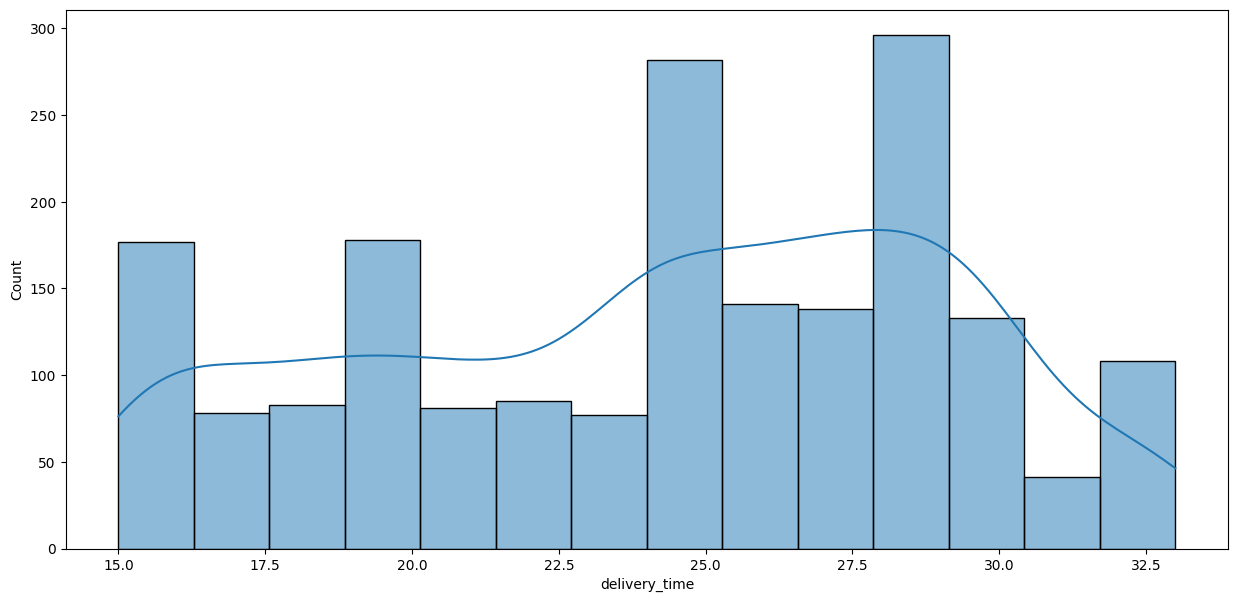

In [13]:

plt.figure(figsize=(15, 7))
sns.histplot(data=food,x='delivery_time', kde= True);

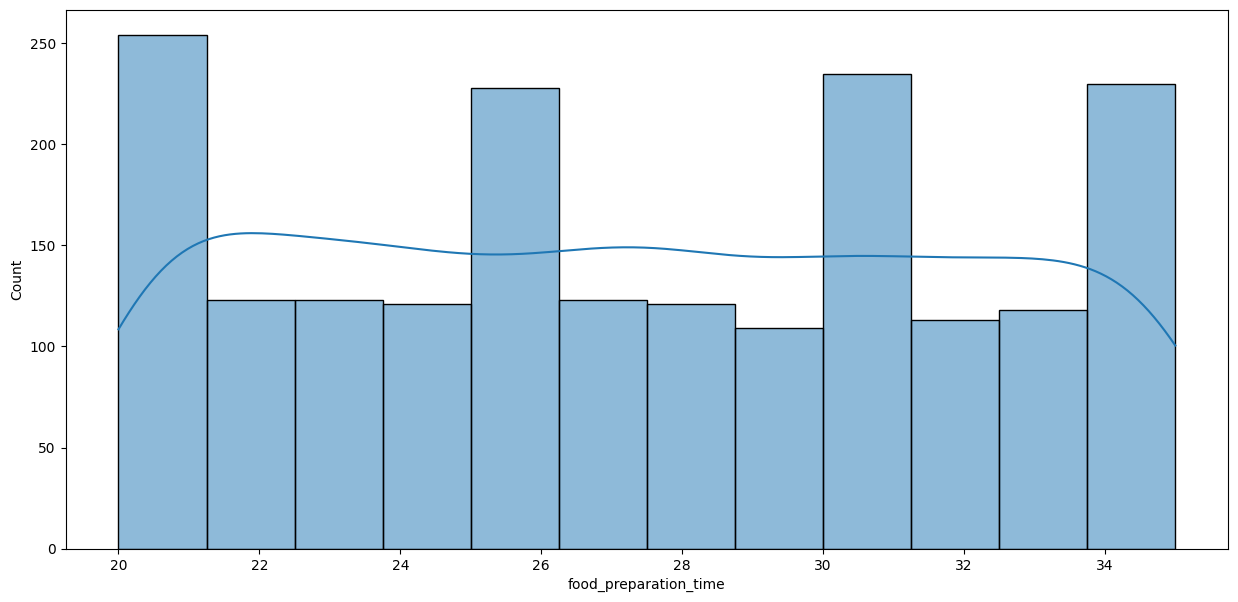

In [14]:

plt.figure(figsize=(15, 7))
sns.histplot(data=food,x='food_preparation_time', kde= True);

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [15]:
# Write the code here

Top5_Restaurants= food.groupby('restaurant_name').count()[['order_id']].sort_values('order_id', ascending=False).reset_index().head(5).rename(columns={'order_id': 'Orders'})
Top5_Restaurants

,restaurant_name,Orders
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


#### Observations:
Shake Shack is the #1 restaurant in terms of Orders Received with 219 Orders to its name, followed by The Meatball shop with 132 Orders and Blue Robbon Sushi with 119 Orders.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [24]:
# Write the code here
#food[food['day_of_the_week']=='Weekend']
#food[food['day_of_the_week']=='Weekend'].groupby('cuisine_type').count()[['order_id']].sort_values('order_id',ascending=False)
food['rating'] = pd.to_numeric(food['rating'], errors='coerce')
food[food['day_of_the_week']=='Weekend'].groupby('cuisine_type')['rating'].mean().sort_values(ascending=False).to_frame().rename(columns={'rating':'Average Rating'}).head(1)


,Average Rating
cuisine_type,
Spanish,4.833333


#### Observations:
Spanish is the most popular cuisine on weekends with an average rating of 4.83.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
round(food[food['cost_of_the_order']>20].count()[['order_id']]/food.count()[['order_id']]*100,2)

#### Observations:
About 29% of the Orders cost more than 20 dollars

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
food[['delivery_time']].mean()

#### Observations:
Mean Order Delviery Time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
food.groupby('customer_id').count()[['order_id']].sort_values('order_id', ascending=False).reset_index().head(3).rename(columns={'order_id': 'Orders'})



#### Observations:
Customer ID 52832 is the most frequent buyer with the highest orders placed among all customers.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [ ]:
# Write the code here
plt.figure(figsize=(20,6))
sns.catplot(data=food,x= 'rating', y='food_preparation_time', kind='bar')
plt.xticks(rotation=90);

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [52]:
# Write the code here
#food['rating_new']=food['rating'].astype(float)
food.groupby('restaurant_name')['rating'].mean()
food.info()


,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time,rating_new
count,1.898000e+03,1898.000000,1898.000000,1162.000000,1898.000000,1898.000000,1162.000000
mean,1.477496e+06,171168.478398,16.498851,4.344234,27.371970,24.161749,4.344234
std,5.480497e+02,113698.139743,7.483812,0.741478,4.632481,4.972637,0.741478
min,1.476547e+06,1311.000000,4.470000,3.000000,20.000000,15.000000,3.000000
25%,1.477021e+06,77787.750000,12.080000,4.000000,23.000000,20.000000,4.000000
50%,1.477496e+06,128600.000000,14.140000,5.000000,27.000000,25.000000,5.000000
75%,1.477970e+06,270525.000000,22.297500,5.000000,31.000000,28.000000,5.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000,5.000000


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [110]:
# Write the code here


#No of Orders > $5 and less than $21
Orders_5plus=food[(food['cost_of_the_order']<21) & (food['cost_of_the_order']>5)].count()[['order_id']]
Orders_20plus=food[food['cost_of_the_order']>20].count()[['order_id']]

Rev_20plus_orders=sum(food[food['cost_of_the_order']>20]['cost_of_the_order']*0.25 )
Rev_20plus_orders
Rev_5plus_orders=sum(food[(food['cost_of_the_order']<21) & (food['cost_of_the_order']>5)]['cost_of_the_order']*0.15)
Net_Revenue=(Rev_5plus_orders+Rev_20plus_orders)
print('Net_Revenue is: $', round(Net_Revenue))
print('Rev from 5plus i.e. 6-20 Orders is: $', round(Rev_5plus_orders))
print('Rev from 20+ Orders is: $', round(Rev_20plus_orders))


Net_Revenue is: $ 6236
Rev from 5plus i.e. 6-20 Orders is: $ 2548
Rev from 20+ Orders is: $ 3689


#### Observations:
Net Revenue generated by the company across all orders is $3,727.

There were 1,357 orders whose cost is more than 5 dollars generating a revenue of 38 and
555 Orders whose cost is greater than 20 dollars generating a revenue of $3,689

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [116]:
# Write the code here
food['delivery_time'] = pd.to_numeric(food['delivery_time'], errors='coerce')

#Total_Delivery_Time =
food['Total_Time']=food['delivery_time']+food['food_preparation_time']
food_with_delivery_more_than_60_min=food[food['Total_Time']>60].count()[['order_id']]
Percent_more_than_60_min=round(100*food_with_delivery_more_than_60_min/food.count()[['order_id']],2)
Percent_more_than_60_min
#print('Percent Orders with delivery time over an hour :',Percent_more_than_60_min)

,0
order_id,10.54


#### Observations:
About 10.5% of the orders take more than an hour to get delivered from the time order was placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [117]:
# Write the code here
food['delivery_time'] = pd.to_numeric(food['delivery_time'], errors='coerce')

food.groupby('day_of_the_week')['delivery_time'].mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:
Orders are delivered almost 6 minutes faster on weekends when compared to weekdays.

Mean Delivery Time on Weekend is 22.47 minutes while that on a weekday is 28.34 minutes.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---